In [1]:
import pandas as pd

data = pd.read_csv('datas.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  240 non-null    object 
 1   likes                  240 non-null    object 
 2   views                  240 non-null    float64
 3   year                   240 non-null    float64
 4   month                  240 non-null    float64
 5   day                    240 non-null    float64
 6   script                 235 non-null    object 
 7   chennel                240 non-null    float64
 8   local                  240 non-null    object 
 9   restaurant_type        240 non-null    object 
 10  guest_info             240 non-null    object 
 11  food_scenes            240 non-null    float64
 12  eating_scenes          238 non-null    float64
 13  drinking_scene         240 non-null    float64
 14  restaurant_info_scene  239 non-null    float64
 15  conver

In [2]:
# like 를 int 로 수정
def str_to_int(x):
    x = str(x).replace('만','0000').replace('천','000')
    if "." in x:
        x = x[:-1].replace('.','')
    x = x if x != 'NaN' else 0
    return int(x)

def like_to_count(data):
    data['likes'] = data['likes'].fillna(0).apply(str_to_int)
    return data

data = like_to_count(data)
print(data['likes'])

0      12000
1      10000
2      15000
3      10000
4       6900
       ...  
235     1300
236      672
237      710
238      802
239      924
Name: likes, Length: 240, dtype: int64


In [3]:
# 영상 시간 int 변환
def to_sec(x):
    time = x.split(":")
    sec = (int(time[1]) if len(time) > 1 else 0) + (int(time[0]) * 60 if len(time) > 1 else int(time[0]))
    return int(sec)

def time_to_sec(data):
    data['run_time'] = data['run_time'].fillna('0').apply(to_sec)
    return data

data = time_to_sec(data)
print(data['run_time'])

0      1457
1      1653
2      2082
3      2089
4      1631
       ... 
235    2001
236    1818
237    1955
238    1902
239    1751
Name: run_time, Length: 240, dtype: int64


In [4]:
# title 은 의미가 없어서 제외시켰음 스크립트는 처리하기 어려워 보여 제외하였음
x = data.drop(columns=['title','views','script'])
y = data['views']
print(x.columns)

Index(['likes', 'year', 'month', 'day', 'chennel', 'local', 'restaurant_type',
       'guest_info', 'food_scenes', 'eating_scenes', 'drinking_scene',
       'restaurant_info_scene', 'conversation_scene', 'run_time'],
      dtype='object')


In [5]:
from sklearn.preprocessing import LabelEncoder
# 범주형 데이터들 label encoding

def label_encode(data):
    lbe = LabelEncoder()
    data['guest_info'] = lbe.fit_transform(data['guest_info'])
    data['restaurant_type'] = lbe.fit_transform(data['restaurant_type'])
    data['local'] = lbe.fit_transform(data['local'])
    return data

x = label_encode(x)
print(x['guest_info'].unique())
print(x['restaurant_type'].unique())
print(x['local'].unique())

[0 1 2]
[ 8  1 13  9  3  6 10 12  2  5 11  7  4  0]
[25  2 42 39 47 52 11 14 31 45 38 40 27 59 48 36 35 21 46 56 60  8 58  9
 24 37 54 33 44 43 41 34 28 20 23 50 51 30 18 17 53 19 29 12 32 26 57 16
 49 55 15 22  6  1  3  0  4  5 10  7 13]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# RandomForest 모델을 사용할 것이므로 정규화는 따로 하지 않았음
# 데이터가 적어 학습 시 shuffle 에 따라 score 가 크게 변함
def model(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)

    print(rfr.score(x_test,y_test))
    print(rfr.feature_importances_)

print(x.columns)
model(x,y)

Index(['likes', 'year', 'month', 'day', 'chennel', 'local', 'restaurant_type',
       'guest_info', 'food_scenes', 'eating_scenes', 'drinking_scene',
       'restaurant_info_scene', 'conversation_scene', 'run_time'],
      dtype='object')
0.8001083654386769
[0.88156694 0.01597281 0.00528303 0.014272   0.01171418 0.01407101
 0.00792909 0.00532649 0.00121375 0.00112446 0.00354539 0.00545559
 0.0209172  0.01160807]


<Axes: >

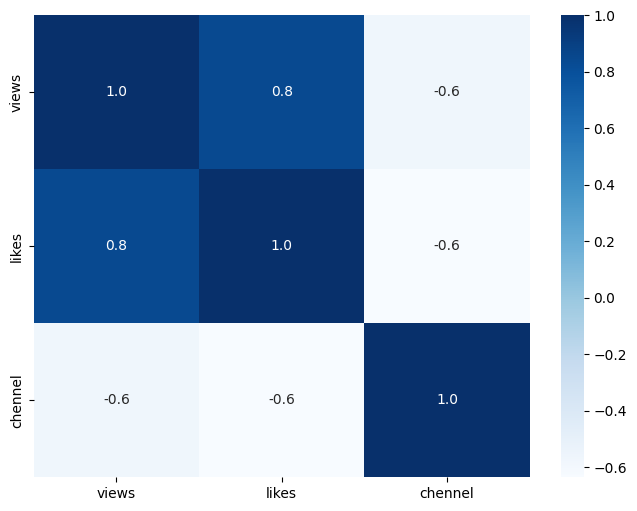

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# likes 에 너무 많은 영향을 받고 likes 는 동영상을 올린다고 가정할 때 바로 알 수 없는 데이터 이므로 제외 하였음
plt.figure(figsize=(8,6))
sns.heatmap(data[['views','likes','chennel']].corr(),cmap='Blues',annot=True,fmt='.1f')

In [8]:
print(x.drop(columns=['likes']).columns)
model(x.drop(columns=['likes']),y)

Index(['year', 'month', 'day', 'chennel', 'local', 'restaurant_type',
       'guest_info', 'food_scenes', 'eating_scenes', 'drinking_scene',
       'restaurant_info_scene', 'conversation_scene', 'run_time'],
      dtype='object')
0.4937960083673386
[0.10532075 0.06705976 0.04283314 0.31848108 0.07400446 0.03552461
 0.16719108 0.0120804  0.0059883  0.03826301 0.00910566 0.01741422
 0.10673353]


In [9]:
ch_0 = data[data['chennel']==0].sort_values(by='views')
ch_1 = data[data['chennel']==1].sort_values(by='views')

In [10]:
# 먹을텐데는 날짜에 따라 조회수가 상승하는 경향이 있는 것 같고 최자로드는 줄어드는 경향이 있는 것 같음
# 추후 날짜 데이터를 처리하고 그래프등의 방법으로 확인 해보아야함
print(ch_1.head(10))

                                                 title  likes     views  \
169  미공개컷 | 공연 중에도 배고픈 최자의 공연 전 간단한 보양식 만두! | 더밥스튜디...   1200   92693.0   
208  최자로드7 EP.6 | 돼지들의 낮술은 밥술이라고 봐. 제주 햇볕을 시원하게 식혀줄...    470  130166.0   
227         롱타임노소고기(LTNS) 안재홍과 육즙 넘치는 대화💦💦 | 최자로드8 최종화   1200  137987.0   
224  오늘 태국 여행어때? 미뢰를 자극하는 하이엔드 타이푸드(ft.모니카) | 최자로드8...    702  156582.0   
159     EP.4 햄버거 | 버거때문에 결성된 CB MASS? | 더밥스튜디오 | 최자로드3   1300  164273.0   
211  최자로드7 EP.3 | 최(자 제)주도에 오면 닭고기 샤브샤브는 꼭 먹어야 한다고 ...    752  177067.0   
180  최자로드5 EP.16 | 힘 좋은 갯벌장어와 참복 코스 스페셜 (feat. 핫펠트,...   1000  189385.0   
151   제주도 오리전골 + 남미 음식 ft.제주맥주 | 더밥스튜디오 | 최자로드2 X 제주맥주   1300  189624.0   
218  기(氣)가 찬 맛! 산이 통째로 들어간 약초백숙 w/개코, dj friz | 최자로...   1000  196725.0   
206  최자로드7 EP.8 | 낯설지만 익숙한 맛, 한국인이라면 누구나 좋아할 떡볶이 레벨...    716  200275.0   

       year  month   day                                             script  \
169  2020.0   11.0   5.0  ['먹는 것만큼 자본이 적이 없는걸 아는데 말이야 이제 게임 엠마우스 기법', '확...   
208  2022.0    9